<a href="https://colab.research.google.com/github/jayshree346/stock_price_prediction/blob/main/Implimentation_using_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
news=pd.read_csv('/content/news.csv')

In [ ]:
News=news.iloc[1261:]
News


,Unnamed: 0,DATE,Headline
1261,1261,2005-01-03,Anil Ambani resigns from IPCLIdea tapping the ...
1262,1262,2005-01-04,Sensex will breach 7000-level in 2005Major com...
1263,1263,2005-01-05,Aiyar for an end to 1-year oil contractsIndia ...
1264,1264,2005-01-06,ADC slashed; cell tariffs to fallGovt's help r...
1265,1265,2005-01-07,Ambanis headed for split: ReportDividing Relia...
...,...,...,...
6840,6840,2020-06-26,Preferential offers get more pricing options f...
6841,6841,2020-06-27,'Ashok Leyland independent biz; won't be impac...
6842,6842,2020-06-28,Ordinance to let RBI revive banks without mora...
6843,6843,2020-06-29,Techtonic Review: The OnePlus 8 and OnePlus 8 ...


In [ ]:
import nltk

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sent=SentimentIntensityAnalyzer()

In [ ]:
Negative=[]
Positive=[]
Neutral=[]
for i in News['Headline']:
  Negative.append(sent.polarity_scores(str(i))['neg'])
  Positive.append(sent.polarity_scores(str(i))['pos'])
  Neutral.append(sent.polarity_scores(str(i))['neu'])

In [ ]:
Negative,Neutral,Positive

In [ ]:
import pandas as pd
import io
train=pd.read_csv('/content/GOOG (2).csv')

In [ ]:
from fbprophet import Prophet

In [ ]:
train=train.reset_index()[['Date','Open','High','Low','Close','Volume']].rename({'Date':'ds','Close':'y'},axis='columns')
train['ds']=pd.to_datetime(train['ds'])

In [ ]:

New_month=[]
for i in pd.DatetimeIndex(train['ds']).day:
  if(i>5):
    New_month.append(0)
  else:
    New_month.append(1)

In [ ]:
New_year=[]
for i,j in zip(pd.DatetimeIndex(train['ds']).day,pd.DatetimeIndex(train['ds']).month):
  if(i==31 and j==12):
    New_year.append(1)
    
  elif(i>=1and i<5 and j==1):
    New_year.append(1)

  else:
    New_year.append(0)

In [ ]:
train['New_year']=New_year
train['New_month']=New_month


In [ ]:
News['DATE']=pd.to_datetime(News['DATE'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
News['Positive']=Positive
News['Neutral']=Neutral
News['Neagtive']=Negative

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
News

,Unnamed: 0,DATE,Headline,Positive,Neutral,Neagtive
1261,1261,2005-01-03,Anil Ambani resigns from IPCLIdea tapping the ...,0.030,0.870,0.100
1262,1262,2005-01-04,Sensex will breach 7000-level in 2005Major com...,0.000,1.000,0.000
1263,1263,2005-01-05,Aiyar for an end to 1-year oil contractsIndia ...,0.134,0.753,0.112
1264,1264,2005-01-06,ADC slashed; cell tariffs to fallGovt's help r...,0.179,0.708,0.113
1265,1265,2005-01-07,Ambanis headed for split: ReportDividing Relia...,0.036,0.929,0.036
...,...,...,...,...,...,...
6840,6840,2020-06-26,Preferential offers get more pricing options f...,0.000,0.914,0.086
6841,6841,2020-06-27,'Ashok Leyland independent biz; won't be impac...,0.107,0.809,0.085
6842,6842,2020-06-28,Ordinance to let RBI revive banks without mora...,0.130,0.870,0.000
6843,6843,2020-06-29,Techtonic Review: The OnePlus 8 and OnePlus 8 ...,0.030,0.970,0.000


In [ ]:
train

,ds,Open,High,Low,y,Volume,New_year,New_month
0,2005-01-03,98.331429,101.439781,97.365051,100.976517,31807000,1,1
1,2005-01-04,100.323959,101.086105,96.378746,96.886841,27614900,1,1
2,2005-01-05,96.363808,98.082367,95.756081,96.393692,16534800,0,1
3,2005-01-06,97.175758,97.584229,93.509506,93.922951,20851900,0,0
4,2005-01-07,94.964050,96.762314,94.037521,96.563057,19398200,0,0
...,...,...,...,...,...,...,...,...
4032,2021-01-08,1787.979980,1809.839966,1773.535034,1807.209961,2050600,0,0
4033,2021-01-11,1786.069946,1794.314941,1760.520020,1766.719971,1209700,0,0
4034,2021-01-12,1753.920044,1778.040039,1725.310059,1746.550049,1357700,0,0
4035,2021-01-13,1738.579956,1765.035034,1738.010010,1754.400024,1094100,0,0


In [ ]:
News=News.rename({'DATE':'ds'},axis='columns')

In [ ]:
df=train.merge(News,how='inner')

In [ ]:
df

,ds,Open,High,Low,y,Volume,New_year,New_month,Unnamed: 0,Headline,Positive,Neutral,Neagtive
0,2005-01-03,98.331429,101.439781,97.365051,100.976517,31807000,1,1,1261,Anil Ambani resigns from IPCLIdea tapping the ...,0.030,0.870,0.100
1,2005-01-04,100.323959,101.086105,96.378746,96.886841,27614900,1,1,1262,Sensex will breach 7000-level in 2005Major com...,0.000,1.000,0.000
2,2005-01-05,96.363808,98.082367,95.756081,96.393692,16534800,0,1,1263,Aiyar for an end to 1-year oil contractsIndia ...,0.134,0.753,0.112
3,2005-01-06,97.175758,97.584229,93.509506,93.922951,20851900,0,0,1264,ADC slashed; cell tariffs to fallGovt's help r...,0.179,0.708,0.113
4,2005-01-07,94.964050,96.762314,94.037521,96.563057,19398200,0,0,1265,Ambanis headed for split: ReportDividing Relia...,0.036,0.929,0.036
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3863,2020-06-24,1461.510010,1475.420044,1429.750000,1431.969971,1756000,0,0,6838,IT stocks shrug off H-1B jittersFinmin calls m...,0.023,0.873,0.104
3864,2020-06-25,1429.900024,1442.900024,1420.000000,1441.329956,1230500,0,0,6839,Truck firms look for new export markets to sel...,0.134,0.831,0.035
3865,2020-06-26,1431.390015,1433.449951,1351.989990,1359.900024,4267700,0,0,6840,Preferential offers get more pricing options f...,0.000,0.914,0.086
3866,2020-06-29,1358.180054,1395.599976,1347.010010,1394.969971,1810200,0,0,6843,Techtonic Review: The OnePlus 8 and OnePlus 8 ...,0.030,0.970,0.000


In [ ]:

df.corr()['y']

Open          0.999735
High          0.999858
Low           0.999875
y             1.000000
Volume       -0.542834
New_year      0.009412
New_month    -0.003807
Unnamed: 0    0.923185
Positive      0.114166
Neutral      -0.127199
Neagtive      0.047738
Name: y, dtype: float64

In [ ]:
x_train=df.iloc[:3700]
x_test=df.iloc[3700:3730]


In [ ]:
X=x_train[['ds','y','New_year','New_month','Positive','Neutral','Neagtive']]
X_test=x_test[['y']]

In [ ]:
m=Prophet(changepoint_prior_scale=3,holidays_prior_scale=0.001,changepoint_range=1,n_changepoints=100)
m.add_country_holidays(country_name='IN')
m.add_regressor('New_year')
m.add_regressor('New_month')
m.add_regressor('Positive')
m.add_regressor('Neagtive')
m.add_regressor('Neutral')

In [ ]:
m.fit(X)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.6/dist-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030



In [ ]:
future=m.make_future_dataframe(periods=30)
data=pd.DataFrame({'ds':future['ds'],'New_year':df['New_year'].iloc[:3730],'New_month':df['New_month'].iloc[:3730],'Positive':df['Positive'].iloc[:3730],
                   'Neagtive':df['Neagtive'].iloc[:3730],'Neutral':df['Neutral'].iloc[:3730]})

/usr/local/lib/python3.6/dist-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030

/usr/local/lib/python3.6/dist-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030



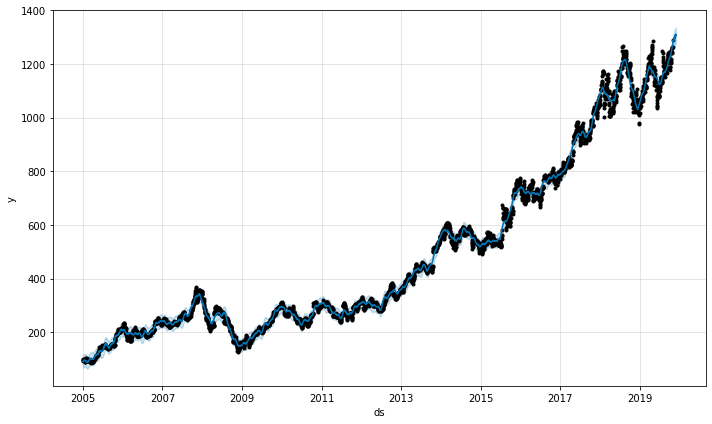

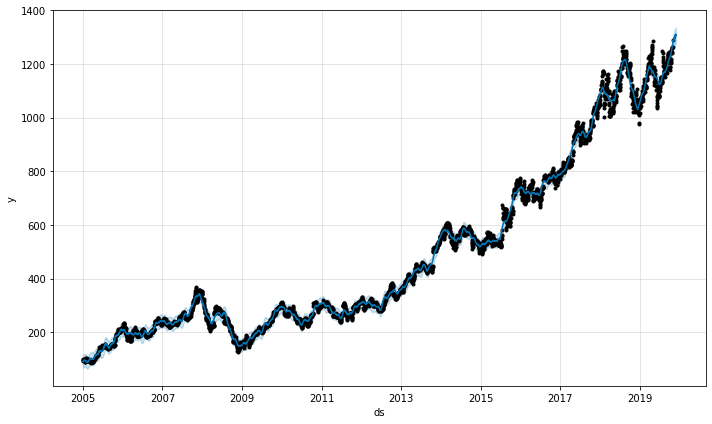

In [ ]:
forecast=m.predict(data)

m.plot(forecast)

In [ ]:
pred=pd.DataFrame({'Close':x_test['y'],'Predicted':forecast['yhat'].iloc[3700:3730]})

In [ ]:
pred

,Close,Predicted
3700,1261.290039,1276.264096
3701,1260.109985,1277.780909
3702,1273.739990,1278.564445
3703,1291.369995,1287.975305
3704,1292.030029,1289.876986
3705,1291.800049,1283.402807
3706,1308.859985,1284.674747
3707,1311.369995,1285.527753
3708,1299.189941,1285.454169
3709,1298.800049,1287.881183


In [ ]:
error=[]
for i,j in zip(pred['Close'],pred['Predicted']):
  error.append(abs(i-j))

In [ ]:
max(error)

46.71932305899941

In [ ]:
import numpy as np

(np.mean((error)))


16.943277393467223

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
error=np.sqrt(mean_squared_error(pred['Close'],pred['Predicted']))
error

21.15911100166239